# 0.4 Train SVM model

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import src.features.build_features as bf

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
dataset = pd.read_csv("data/features_resolut_200_new_seg_1_med_skew.csv")

In [6]:
X = dataset.iloc[:, 2:]
X.head(15)

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,...,med_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b,contrast,correlation,entropy
0,8187.0,4586.0,3,539.730009,75,128,0.585938,1.172591,35.581835,51.114156,...,32.0,7.376986,7.378028,8.026931,0.846212,0.110724,0.494894,620.820617,0.954376,2.730047
1,9701.0,5565.0,2,483.730009,111,112,0.991071,1.281517,24.120681,57.723131,...,33.0,6.267867,7.597510,7.166313,1.058406,-0.323742,0.534834,553.964840,0.961171,2.987405
2,7145.5,3140.0,3,218.994947,63,65,0.969231,0.573088,6.711747,58.042280,...,36.0,7.900968,7.388426,7.264481,1.803612,0.264062,1.199339,512.600976,0.955396,2.381115
3,8913.5,4447.5,3,270.208151,68,93,0.731183,0.709486,8.191221,57.778771,...,33.0,6.473530,5.690610,6.561376,1.330778,0.469514,0.959483,416.275869,0.969042,2.628161
4,11962.5,7318.5,2,343.747255,103,104,0.990385,0.895465,9.877716,54.340214,...,35.0,7.712841,7.795521,8.419461,0.533848,0.048640,0.046007,478.351987,0.971566,3.609471
5,9689.5,5167.0,2,279.622364,76,87,0.873563,0.682388,8.069422,59.784693,...,35.0,6.027561,4.848478,6.635850,1.391676,-0.035480,0.759057,363.621412,0.973574,2.775649
6,12881.0,12881.0,1,587.528998,172,155,1.109677,2.069715,26.798410,57.739342,...,27.0,11.768665,10.817419,11.546140,0.961481,0.046497,0.394153,387.370530,0.977156,3.822080
7,9746.5,6647.0,2,700.239675,107,151,0.708609,1.657723,50.308891,48.814101,...,30.0,6.707182,6.906068,8.054558,1.108876,0.381566,0.677175,727.002441,0.953473,3.019513
8,11406.5,5470.0,3,315.563488,89,87,1.022989,0.678823,8.730138,57.111594,...,34.0,5.550765,6.946240,7.125686,-0.107417,-0.831615,-0.311977,550.005539,0.964877,3.330982
9,6522.5,6522.5,1,580.600066,107,181,0.591160,2.969260,51.682091,54.884394,...,24.0,10.418261,8.172561,8.477522,0.991669,0.712567,1.114235,407.812854,0.963857,2.173767


In [7]:
X.drop(columns=['correlation', 'contrast', 'entropy', 'physiological_length', 'physiological_width', 'rectangularity'], inplace=True)

In [8]:
y = dataset.iloc[:,1]
y.head(5)

0    9
1    9
2    9
3    9
4    9
Name: label, dtype: int64

## Cross validational split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 140) #r state 140

In [11]:
from sklearn import preprocessing

In [12]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()
#scaler = preprocessing.MinMaxScaler()
#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.transform(X_test)

In [13]:
X_train_std

,area,largest_area,number_of_elems,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,med_r,med_g,med_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
4589,1.012152,1.283906,-0.677785,0.130119,0.340504,-0.413130,0.759149,1.150612,-0.279169,0.679786,0.923856,-0.231713,0.053712,-0.236181,-1.135215,-0.548168,-0.093455,-0.645840
3622,-1.229025,-0.967613,-0.677785,-0.526520,-1.027909,-0.063911,0.701134,-0.147950,1.535596,0.421030,-0.203025,1.046109,0.871944,-0.122400,0.318510,2.290206,2.976556,1.402473
3828,3.386291,3.669002,-0.677785,0.108728,-0.208888,-0.534697,0.319772,-0.601561,2.499133,0.421030,-0.541090,2.749871,-1.236883,-0.616009,-0.563506,-2.171511,-0.555446,-1.538022
2166,1.111406,1.071548,0.269220,0.267400,0.028727,-0.387369,-0.157872,-0.085706,-0.305391,0.032898,-0.090337,-0.089733,0.253915,1.383862,0.754124,-1.190198,-0.364855,-1.011851
4275,2.223684,1.887235,2.163229,1.355787,0.066830,-0.210542,-1.025781,-0.190402,1.162087,-1.002123,-0.315714,1.046109,1.171189,0.917817,0.405597,0.231094,0.739663,-0.290780
3598,-1.696737,-1.437483,-0.677785,-0.943767,-0.985157,1.437551,-0.485200,-0.545941,1.149395,-0.743368,-0.428402,1.330069,0.462451,-0.324020,-0.014767,0.747011,0.135328,-0.515801
903,0.850395,-0.082785,0.269220,-0.372530,-0.951115,-0.515507,0.857055,0.986472,-2.161544,0.938541,1.149232,-2.077455,-0.681877,0.315357,0.336106,-0.917243,-0.898954,0.587334
4011,0.832956,-0.202016,0.269220,-0.985429,0.046711,-0.614386,-0.513608,0.088026,-0.752978,-0.484612,0.135039,-0.657653,-1.377472,-1.120899,-1.681731,1.743414,-1.787746,-0.212259
2632,0.300635,0.569107,-0.677785,-0.172509,-0.273192,-0.419777,1.502419,1.286177,0.402867,1.456051,1.374608,0.336208,-0.278567,0.058648,0.085619,-0.142042,-1.523841,1.228735
904,0.789181,0.630721,0.269220,-0.020780,0.552195,-0.430620,0.679351,0.766873,-1.937216,0.679786,0.923856,-2.503396,-0.639412,-0.009061,2.410095,-0.641180,-1.304642,0.392758


## Applying SVM classifier model

In [14]:
from sklearn import svm

In [59]:
clf = svm.SVC(kernel='rbf', C=795, decision_function_shape='ovo', gamma=0.012)#700, 0.01, no 'corr'
#kernel='rbf', C=2000, decision_function_shape='ovo', gamma=0.003 -rect -circ
#kernel='rbf', C=800, decision_function_shape='ovo', gamma=0.012 - rect
#kernel='rbf', C=3150, decision_function_shape='ovo', gamma=0.00191
clf.fit(X_train_std, y_train)

SVC(C=795, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.012, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
y_pred = clf.predict(X_test_std)

In [61]:
from sklearn import metrics

In [62]:
metrics.f1_score(y_test, y_pred, average='micro')

0.8905263157894737

In [63]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        86
           1       0.88      0.94      0.91       113
           2       0.90      0.86      0.88       111
           3       0.89      0.93      0.91        67
           4       0.98      0.94      0.96       106
           5       1.00      0.97      0.99        40
           6       0.83      0.79      0.81        48
           7       0.88      0.92      0.90        53
           8       0.94      0.94      0.94       108
           9       0.90      0.85      0.88        55
          10       0.83      0.84      0.84       119
          11       0.62      0.55      0.58        44

   micro avg       0.89      0.89      0.89       950
   macro avg       0.88      0.88      0.88       950
weighted avg       0.89      0.89      0.89       950



## GridSearch

In [93]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e-2 to 1e5
    C_range = np.logspace(-1, 5, 6)
    #gamma from 1e-5 to 1e3
    gamma_range = np.logspace(-1, 5, 6)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid

In [94]:
svm_grid = gridSearch(X_train_std, y_train)

In [95]:
y_pred_svm_grid = svm_grid.predict(X_test_std)

In [96]:
metrics.f1_score(y_test, y_pred_svm_grid, average='micro')

0.7835558678847505

In [97]:
svm_grid.best_params_

{'C': 25.118864315095795, 'gamma': 0.1}

## Save model

In [229]:
import pickle

In [230]:
# save the classifier
with open('/Users/anacriel/plant_seed_classification/models/svm_0_85.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [64]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [65]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
import mahotas as mt
from matplotlib import pyplot as plt
from src.data.make_dataset import create_dataset_added_features

In [66]:
data_dir = '../data/raw/'
test_image_dir = os.path.join(data_dir, 'test')

In [67]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [68]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [69]:
features_of_img = create_dataset_added_features(images, titles, kind='title')

/Users/anacriel/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:132: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [70]:
features_of_img.drop(columns='title', inplace=True)
#features_of_img.drop(columns=['circularity'], inplace=True)

In [71]:
features_of_img.head(5)

,area,largest_area,number_of_elems,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,med_r,med_g,med_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
0,10580.5,10580.5,1,928.163555,1.073864,81.422200,66.522491,78.537243,28.070087,66.0,80.0,28.0,6.588221,7.711873,8.646757,1.416104,-1.413990,0.391195
0,1643.5,978.5,2,492.575681,0.415094,147.630546,63.813454,68.121660,37.217557,61.0,68.0,37.0,10.314891,8.029822,10.381713,1.187031,0.102971,0.672256
0,10180.5,10180.5,1,538.315796,1.927083,28.464604,68.855291,83.153927,30.350985,69.0,84.0,30.0,6.836473,8.585365,8.697137,-0.112942,-1.507717,0.263961
0,6144.0,6144.0,1,529.126980,0.724868,45.568906,69.576053,82.252514,35.863205,69.0,82.0,37.0,7.004019,8.818881,11.333729,0.788279,-0.187653,-0.203333
0,16558.0,16558.0,1,969.518893,0.984293,56.768141,58.105979,71.751281,32.756946,58.0,72.0,34.0,5.816306,6.287196,10.117489,0.610281,-1.161517,-0.646127


In [72]:
features_of_img = (features_of_img - X_train.mean()) / X_train.std()
#features_of_img = scaler.transform(features_of_img)

In [73]:
y_test_pred = clf.predict(features_of_img)

In [74]:
y_test_pred[0]

6

In [75]:
len(titles)

794

In [76]:
len(features_of_img)

794

In [77]:
cols = {'file':titles, 'species':y_test_pred}

In [78]:
submission_df = pd.DataFrame(data=cols)

In [79]:
submission_df.iloc[520]

file       e721c6ac8.png
species               11
Name: 520, dtype: object

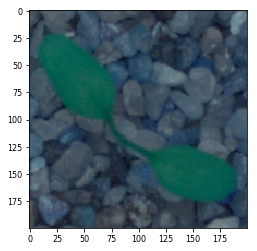

In [80]:
plt.imshow(images[791])

In [81]:
features_of_img

,area,largest_area,number_of_elems,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,med_r,med_g,med_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
0,0.703621,0.973952,-0.677785,0.972483,-0.154856,-0.092123,-0.259511,0.167423,-0.504625,-0.225857,0.247727,-0.373693,-0.901896,-0.501523,-0.709028,0.905502,-1.255215,-0.445496
0,-1.388440,-1.284152,0.26922,-0.380379,-0.856336,0.378596,-0.628190,-1.096868,0.884881,-0.872745,-1.104530,0.904129,0.687601,-0.379259,-0.049447,0.618294,0.521816,-0.104978
0,0.609985,0.879884,-0.677785,-0.238318,0.753682,-0.468634,0.057966,0.727818,-0.158156,0.162275,0.698479,-0.089733,-0.796012,-0.165631,-0.689875,-1.011597,-1.365011,-0.599646
0,-0.334919,-0.069380,-0.677785,-0.266857,-0.526479,-0.347028,0.156056,0.618400,0.679154,0.162275,0.473103,0.904129,-0.724550,-0.075835,0.312483,0.118344,0.181367,-1.165794
0,2.102893,2.379681,-0.677785,1.100926,-0.250234,-0.267405,-1.404935,-0.656288,0.207311,-1.260878,-0.653778,0.478188,-1.231133,-1.049367,-0.149897,-0.104829,-0.959457,-1.702259
0,-1.382705,-1.122002,-0.677785,-0.305009,0.749416,0.467589,-0.370554,-0.853569,1.437390,-0.355235,-0.879154,1.472049,-0.587557,-0.747615,-0.971701,0.039884,-0.104006,-0.731209
0,1.805131,2.080545,-0.677785,-0.268622,0.529780,-0.541068,-0.097794,0.169991,-0.600502,-0.096480,0.247727,-0.515673,-0.554912,-0.883405,-0.599231,0.229846,-0.984324,-0.016354
0,-0.201956,-0.299612,0.26922,1.471129,-0.516355,0.584518,0.376673,0.325671,0.259775,0.291653,0.247727,0.336208,0.157960,0.252214,0.527653,0.582448,-0.244907,0.160728
0,0.019610,0.286785,-0.677785,0.228074,-0.409093,-0.230969,0.505650,0.647029,-1.614776,0.679786,0.923856,-1.509535,-0.454304,0.110365,0.165341,-0.733638,-0.702108,0.326267
0,-1.668529,-1.409145,-0.677785,-1.044273,0.135088,0.565464,-0.239823,-1.140596,1.103957,-0.096480,-0.879154,0.904129,0.325031,-0.433809,-1.214572,-1.204247,-0.858744,0.116016


In [82]:
submission_df

,file,species
0,1b490196c.png,6
1,85431c075.png,10
2,506347cfe.png,2
3,7f46a71db.png,0
4,668c1007c.png,3
5,71f5323c5.png,11
6,1f3f44563.png,3
7,beebe5f4e.png,2
8,780defa2e.png,8
9,df521c0c0.png,11


In [83]:
submission_df.to_csv("data/12th_submission.csv")

In [84]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [85]:
mapping_rev = {v : k for k, v in mapping.items()}

In [86]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [87]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Shepherds Purse
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Scentless Mayweed
3,7f46a71db.png,Sugar beet
4,668c1007c.png,Charlock
5,71f5323c5.png,Black-grass
6,1f3f44563.png,Charlock
7,beebe5f4e.png,Scentless Mayweed
8,780defa2e.png,Common Chickweed
9,df521c0c0.png,Black-grass


In [88]:
submission_df.to_csv("/Users/anacriel/submission.csv", index=False)